In [1]:
# https://www.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ

In [2]:
!wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt

--2024-12-30 15:32:39--  https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2024-12-30 15:32:39 (8.41 MB/s) - ‘names.txt’ saved [228145/228145]



In [3]:
# NeuralNet
# recieve single char as input and return prob distrubition for next char

In [4]:
words = open("names.txt", "r").read().splitlines()

In [5]:
chars = sorted(list(set(''.join(words))))

In [6]:
stoi = {s:(i+1) for i,s in enumerate(chars)}
# use "." as special char instead of <S> or <E>
stoi['.'] = 0

In [7]:
import torch

In [8]:
# create training set
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [9]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [10]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [11]:
# one hot encode chars

In [12]:
import torch.nn.functional as F
# we converted one hot to float casue we want to always feed float to neural net not ints
# one_hot always gives 
xenc = F.one_hot(xs, num_classes=27).float()

In [13]:
xenc

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

In [14]:
# weights of neuron
W = torch.randn((27,1))
W

tensor([[-0.4713],
        [ 0.1917],
        [-0.8514],
        [-0.9103],
        [ 0.6197],
        [-0.8198],
        [ 0.1402],
        [ 0.0750],
        [-0.5990],
        [ 0.3754],
        [ 0.3051],
        [-0.0819],
        [ 0.4229],
        [-0.7289],
        [ 0.6423],
        [ 0.0171],
        [-2.3229],
        [ 0.3456],
        [-0.9992],
        [-0.9633],
        [ 1.5095],
        [-0.0537],
        [-1.5488],
        [-0.4896],
        [ 1.3359],
        [-0.9747],
        [ 0.0364]])

In [15]:
# @ means matrix multiplication
xenc @ W

tensor([[-0.4713],
        [-0.8198],
        [-0.7289],
        ...,
        [-0.9747],
        [ 0.0364],
        [ 1.3359]])

In [16]:
# weights of 27 neuron
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), requires_grad=True, generator=g)
W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [-6.7006e-01, -1.2199e+00,  3.0314e-01, -1.0725e+00,  7.2762e-01,
          5.1114e-02,  1.3095e+00, -8.0220e-01, -8.5042e-01, -1.8068e+00,
          1.2523e+00, -1.2256e+00,  1.2165e+00, -9.6478e-01, -2.3211e-01,
         -3.4762e-01,  3.3244e-01, -1.3263e+00,  1.1224e+00,  5.9641e-01,
          4.5846e-01,  5.4011e-02, -1.7400e+00,  1.1560e-01,  8.0319e-01,
          5.4108e-01, -1.1646e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

In [17]:
xenc @ W

tensor([[ 1.5674, -0.2373, -0.0274,  ..., -0.0707,  2.4968,  2.4448],
        [ 0.4724,  1.4830,  0.3175,  ..., -0.4275, -2.1259,  0.9604],
        [ 0.1936,  1.0532,  0.6339,  ...,  1.5447,  0.6006, -0.7091],
        ...,
        [ 0.7414, -0.5879, -0.4651,  ..., -0.1388,  1.3096, -0.2580],
        [ 1.0669,  0.2136, -0.7660,  ...,  1.3405, -0.2175,  0.8627],
        [ 0.2163, -0.7873, -0.3301,  ..., -0.2630, -0.7552,  0.8191]],
       grad_fn=<MmBackward0>)

In [18]:
# assume neural network gives log counts, we exponentiate them to get actual count
logits = (xenc @ W) # log counts
counts = logits.exp()
counts

tensor([[ 4.7940,  0.7888,  0.9730,  ...,  0.9317, 12.1434, 11.5281],
        [ 1.6038,  4.4060,  1.3737,  ...,  0.6521,  0.1193,  2.6128],
        [ 1.2136,  2.8669,  1.8850,  ...,  4.6866,  1.8232,  0.4921],
        ...,
        [ 2.0989,  0.5555,  0.6281,  ...,  0.8704,  3.7049,  0.7726],
        [ 2.9062,  1.2382,  0.4649,  ...,  3.8208,  0.8046,  2.3696],
        [ 1.2415,  0.4551,  0.7189,  ...,  0.7687,  0.4699,  2.2685]],
       grad_fn=<ExpBackward0>)

In [19]:
# prob is count normalized
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0607, 0.0100, 0.0123,  ..., 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248,  ..., 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484,  ..., 0.1204, 0.0469, 0.0126],
        ...,
        [0.0301, 0.0080, 0.0090,  ..., 0.0125, 0.0531, 0.0111],
        [0.0634, 0.0270, 0.0101,  ..., 0.0833, 0.0175, 0.0517],
        [0.0308, 0.0113, 0.0178,  ..., 0.0190, 0.0116, 0.0562]],
       grad_fn=<DivBackward0>)

In [20]:
# we can get prob directly from logits using softmax func
# then no need of doing exp and normalization urself

In [21]:
# gradient descent

In [22]:
torch.arange(len(xs))

tensor([     0,      1,      2,  ..., 228143, 228144, 228145])

In [23]:
# loss function
# negative log likelihood
loss = -probs[torch.arange(len(xs)), ys].log().mean()

In [24]:
loss

tensor(3.7590, grad_fn=<NegBackward0>)

In [25]:
# backward pass
# set grad to zero/none
W.grad = None

loss.backward()

In [26]:
W.grad

tensor([[ 8.5187e-03, -1.7928e-02, -3.9954e-03, -6.1678e-03, -5.0425e-03,
         -4.9855e-03, -1.4495e-03,  3.2138e-04, -1.9076e-03,  1.8004e-03,
         -9.5068e-03, -9.0844e-03, -5.6108e-03, -9.9719e-03,  1.9904e-03,
          3.1664e-02,  6.2140e-03, -5.3713e-05, -3.6864e-03, -8.2406e-03,
         -9.7537e-04,  1.1901e-03, -1.2434e-03,  1.4365e-03,  1.0683e-03,
          1.9233e-02,  1.6413e-02],
        [-2.6880e-02, -1.1534e-03,  3.5157e-03, -5.7258e-04,  4.4327e-03,
          1.5423e-03,  1.5517e-02,  1.2128e-03, -8.3641e-03, -6.5184e-03,
          1.4442e-02, -1.2133e-03,  3.5937e-03, -5.5054e-03, -2.0389e-02,
          2.7948e-03,  5.7026e-03,  8.9113e-04, -9.4968e-04,  2.9929e-03,
          3.8649e-03,  2.9188e-03, -2.8925e-03,  4.1746e-03,  8.9087e-03,
         -1.5171e-03, -5.5008e-04],
        [-2.1135e-04, -1.3155e-03,  1.9726e-04,  3.9496e-04, -1.8479e-04,
         -2.7573e-03,  2.8475e-04,  2.0133e-04, -9.1831e-05, -8.9764e-04,
          6.3084e-04,  1.0287e-04,  9.73

In [27]:
# update weights
W.data += -0.1 * W.grad

In [28]:
# now do it in loop
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    # cause xenc is one hot encoded
    # logits will just select that row of W
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(len(xenc)), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

3.758039712905884
3.370584011077881
3.1537325382232666
3.02016544342041
2.9275617599487305
2.8602912425994873
2.809643268585205
2.770033836364746
2.7380166053771973
2.711449146270752
2.688962697982788
2.6696534156799316
2.652899742126465
2.6382505893707275
2.625364303588867
2.6139698028564453
2.60384464263916
2.5948050022125244
2.5866966247558594
2.579390048980713
2.5727767944335938
2.566765069961548
2.5612776279449463
2.5562491416931152
2.5516247749328613
2.5473577976226807
2.543407678604126
2.5397415161132812
2.536329746246338
2.5331482887268066
2.530174970626831
2.5273914337158203
2.5247812271118164
2.5223300457000732
2.520024538040161
2.5178537368774414
2.5158066749572754
2.5138742923736572
2.5120487213134766
2.5103206634521484
2.508683919906616
2.507131576538086
2.5056586265563965
2.504258394241333
2.502926826477051
2.5016584396362305
2.5004498958587646
2.4992966651916504
2.4981954097747803
2.497142791748047
2.496135950088501
2.4951717853546143
2.4942476749420166
2.493361711502075

In [29]:
# we can have model smoothing in Neural net also
# if we force our weights to be near 0 or same to each other
# then our probibility will be more uniform
# and this is called normalization

In [30]:
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [31]:
# generate names
g = torch.Generator().manual_seed(2147483647)

# generate 5 names
for i in range(5):
    out = []
    # start with start char
    ix = 0
    while True:
        # run neural net on each char
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cfay.
a.


In [32]:
# Neural Net advanced

In [33]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline

In [35]:
# reald all the words
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [36]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [37]:
# build the dataset
block_size = 3 # context length: how many chars do we take input to predict next one

def build_dataset(words):
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y
            

In [38]:
import random
random.seed(42)
# shuffle word
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1]) # 80%
Xdev, Ydev = build_dataset(words[n1:n2]) # 10%
Xte, Yte = build_dataset(words[n2:]) # 10%

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [39]:
# embeds each char to 10 float values
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden, generator=g)
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g)
b2 = torch.randn(vocab_size, generator=g)

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [40]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/ 200000: 27.8817
  10000/ 200000: 2.9571
  20000/ 200000: 2.5722
  30000/ 200000: 2.7646
  40000/ 200000: 2.0305
  50000/ 200000: 2.5794
  60000/ 200000: 2.3242
  70000/ 200000: 2.1174
  80000/ 200000: 2.2993
  90000/ 200000: 2.2481
 100000/ 200000: 2.0146
 110000/ 200000: 2.4534
 120000/ 200000: 1.9164
 130000/ 200000: 2.3719
 140000/ 200000: 2.2377
 150000/ 200000: 2.1441
 160000/ 200000: 2.2661
 170000/ 200000: 1.7855
 180000/ 200000: 2.1126
 190000/ 200000: 1.8004


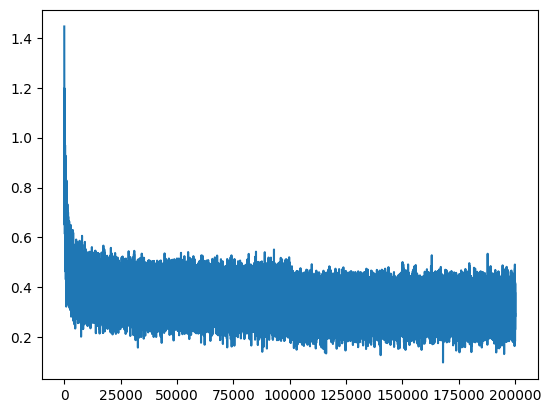

In [41]:
plt.plot(lossi)

In [42]:
@torch.no_grad()
def split_loss(split):
    x,y = {
        "train": (Xtr, Ytr),
        "val": (Xdev, Ydev),
        "test": (Xte, Yte),
    }[split]
    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    h = torch.tanh(embcat @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())

split_loss("train")
split_loss("val")

train 2.1270017623901367
val 2.169905662536621


In [43]:
# embeds each char to 10 float values
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden, generator=g)
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g)
b2 = torch.randn(vocab_size, generator=g)

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [44]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

    break

      0/ 200000: 27.8817


In [45]:
logits[0]

tensor([ -2.3527,  36.4366, -10.7306,   5.7165,  18.6409, -11.6998,  -2.1991,
          1.8535,  10.9996,  10.6730,  12.3507, -10.3809,   4.7243, -24.4257,
         -8.5909,   1.9024, -12.2744, -12.4751, -23.2778,  -2.0163,  25.8767,
         14.2108,  17.7691, -10.9204, -20.7335,   6.4560,  11.1615],
       grad_fn=<SelectBackward0>)

In [46]:
# logits are taking extreme value, initally we want it to be uniform so should be 1/27

In [47]:
# now logits is calulated by adding bias at end, since we want initally logits to be 1/27, we can remove bias
# we also want weights to be less so multiply bu 0.1
# embeds each char to 10 float values
# we dont want to set weights to 0 directly cause we want to give some control to learning also we want them to be close to zero but not zero
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden, generator=g)
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # scale down
b2 = torch.randn(vocab_size, generator=g) * 0 # removed bias

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [48]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

    break

      0/ 200000: 3.3221


In [49]:
logits[0]

tensor([-0.0249,  0.3523, -0.1267,  0.0541,  0.1662, -0.1171, -0.0140,  0.0124,
         0.0921,  0.1135,  0.1362, -0.0925,  0.0444, -0.2459, -0.0971,  0.0125,
        -0.0957, -0.1376, -0.2329, -0.0137,  0.2452,  0.1616,  0.1665, -0.1094,
        -0.2154,  0.0725,  0.1141], grad_fn=<SelectBackward0>)

In [50]:
h

tensor([[ 0.8100, -0.8997, -0.9993,  ..., -0.9097, -1.0000,  1.0000],
        [-1.0000, -0.9571, -0.7145,  ...,  0.4898,  0.9090,  0.9937],
        [ 0.9983, -0.3340,  1.0000,  ...,  0.9443,  0.9905,  1.0000],
        ...,
        [-1.0000,  0.9604, -0.1418,  ..., -0.1266,  1.0000,  1.0000],
        [-1.0000, -0.4385, -0.8882,  ..., -0.3316,  0.9995,  1.0000],
        [-1.0000,  0.9604, -0.1418,  ..., -0.1266,  1.0000,  1.0000]],
       grad_fn=<TanhBackward0>)

In [51]:
# most h is 1 or -1, this is cause tanh is saturated

(array([2069.,  144.,  106.,   82.,   59.,   56.,   44.,   30.,   43.,
          26.,   16.,   38.,   16.,   32.,   24.,   14.,   28.,   27.,
          26.,   19.,   24.,   26.,   30.,   14.,   19.,   19.,   22.,
          26.,   18.,   12.,   10.,   33.,   27.,   32.,   17.,   24.,
          30.,   22.,   26.,   29.,   26.,   40.,   29.,   41.,   49.,
          64.,   62.,  100.,  188., 2442.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <BarContainer object of 50 artists>)

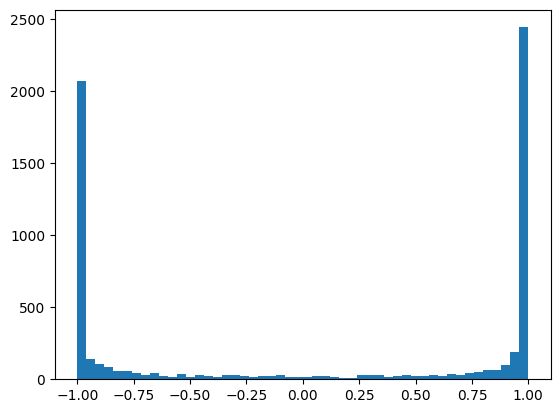

In [52]:
plt.hist(h.view(-1).tolist(), 50)

In [53]:
# tanh is most of the saturateed

(array([  2.,   2.,   1.,   4.,   2.,   4.,   6.,  15.,   5.,  25.,  32.,
         49.,  56.,  59.,  92., 119., 134., 197., 195., 221., 257., 275.,
        297., 341., 353., 375., 369., 349., 358., 362., 271., 312., 229.,
        206., 190., 167.,  87., 111.,  72.,  55.,  41.,  22.,  23.,  18.,
         17.,   8.,   5.,   7.,   2.,   1.]),
 array([-19.05793571, -18.31571732, -17.57349892, -16.83128052,
        -16.08906212, -15.34684372, -14.60462532, -13.86240692,
        -13.12018852, -12.37797012, -11.63575172, -10.89353333,
        -10.15131493,  -9.40909653,  -8.66687813,  -7.92465973,
         -7.18244133,  -6.44022293,  -5.69800453,  -4.95578613,
         -4.21356773,  -3.47134933,  -2.72913094,  -1.98691254,
         -1.24469414,  -0.50247574,   0.23974266,   0.98196106,
          1.72417946,   2.46639786,   3.20861626,   3.95083466,
          4.69305305,   5.43527145,   6.17748985,   6.91970825,
          7.66192665,   8.40414505,   9.14636345,   9.88858185,
         10.630800

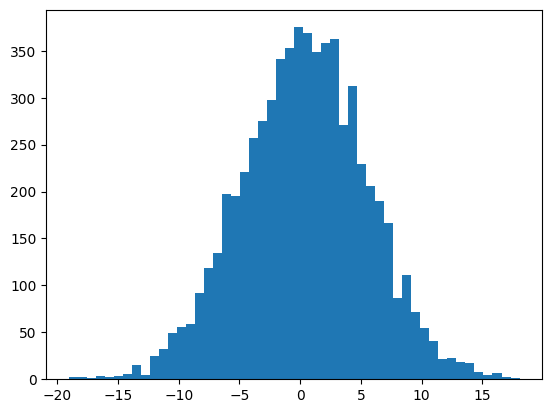

In [54]:
plt.hist(hpreact.view(-1).tolist(), 50)

In [55]:
# this is not cause
# when we are backpropogating thorugh tanh
# remeber grad = (1-t**2) * out.grad
# t close to 1 or -1 then grad will be 0
# whic will stop backprop
# makes sense since tanh is saturated range increasying input a bit wont affect output of tanh in anyway
# so no learning will occur

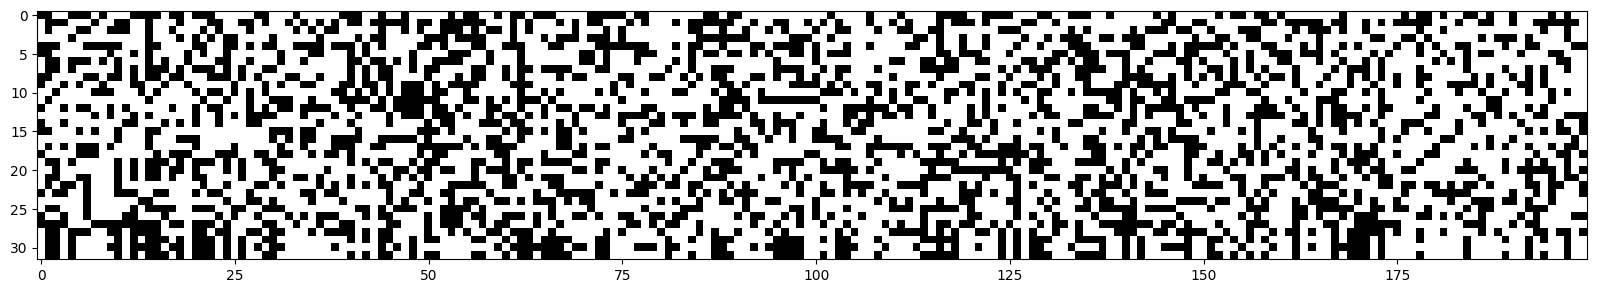

In [56]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap="gray", interpolation="nearest")

In [57]:
# relu has flat region below 0, so in that case if some neuron is below 0 it will never learn
# leaky relu wont suffer from this

In [58]:
# to solbe this problem we wanr hpreact to be close to 0 so it wont be in tanh saturation region
n_embed = 10 # dimension of the char embedding vector
n_hidden = 200 # neuron in hidden layer 

g = torch.Generator().manual_seed(2147483647)
# converts each letter to embedding 
C = torch.randn((vocab_size, n_embed), generator=g)
# first layer
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g) * 0.1
b1 = torch.randn(n_hidden, generator=g) * 0.01
# second layer
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # scale down
b2 = torch.randn(vocab_size, generator=g) * 0 # removed bias

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

11897


In [59]:
max_steps = 200000 # epochs
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch consturct
    # randonly sample some from training of given size
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed char to vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate 3 different vectors
    hpreact = embcat @ W1 + b1 # hidden layer
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    # backward pass
    # set grad to zero
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # torch stats
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

    break

      0/ 200000: 3.3069


(array([  6.,  17.,  20.,  30.,  49.,  61.,  72.,  89.,  87.,  99., 135.,
        121., 153., 134., 138., 140., 174., 163., 179., 184., 138., 196.,
        183., 226., 165., 212., 191., 175., 201., 211., 189., 186., 166.,
        178., 183., 156., 194., 155., 171., 140., 139., 122., 102.,  96.,
         81.,  72.,  41.,  39.,  23.,  18.]),
 array([-0.95476669, -0.91695139, -0.87913609, -0.84132079, -0.80350549,
        -0.76569018, -0.72787488, -0.69005958, -0.65224428, -0.61442898,
        -0.57661368, -0.53879838, -0.50098307, -0.46316777, -0.42535247,
        -0.38753717, -0.34972187, -0.31190657, -0.27409127, -0.23627596,
        -0.19846066, -0.16064536, -0.12283006, -0.08501476, -0.04719946,
        -0.00938416,  0.02843115,  0.06624645,  0.10406175,  0.14187705,
         0.17969235,  0.21750765,  0.25532295,  0.29313826,  0.33095356,
         0.36876886,  0.40658416,  0.44439946,  0.48221476,  0.52003006,
         0.55784537,  0.59566067,  0.63347597,  0.67129127,  0.70910657,
 

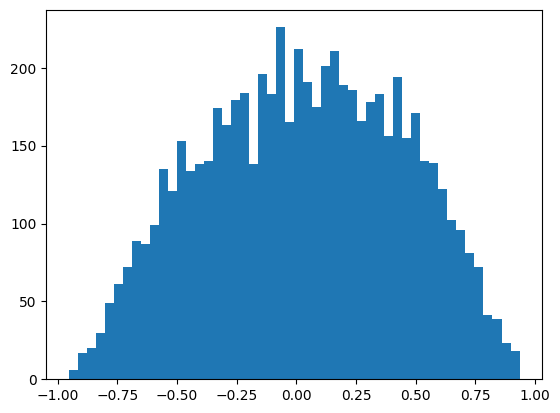

In [60]:
plt.hist(h.view(-1).tolist(), 50)

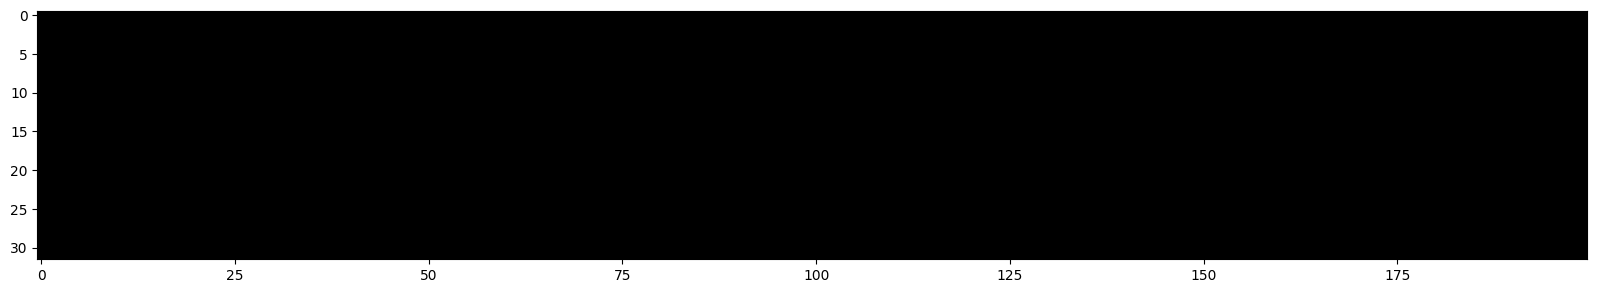

In [61]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap="gray", interpolation="nearest")

In [62]:
# init helps doing productive training
# watched till 28.06